In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

In [53]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

In [54]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])


array([1, 1, 0])

|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1



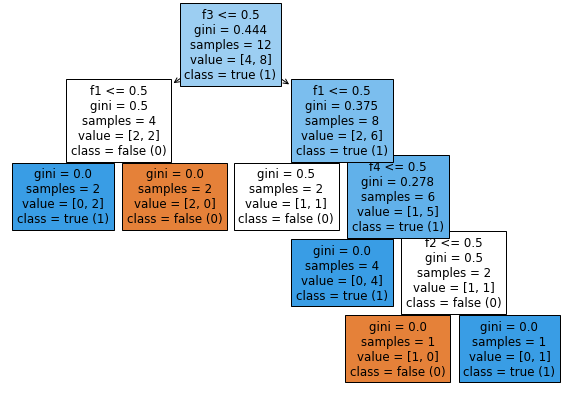

In [43]:
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("f1","f2" , "f3", "f4"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1



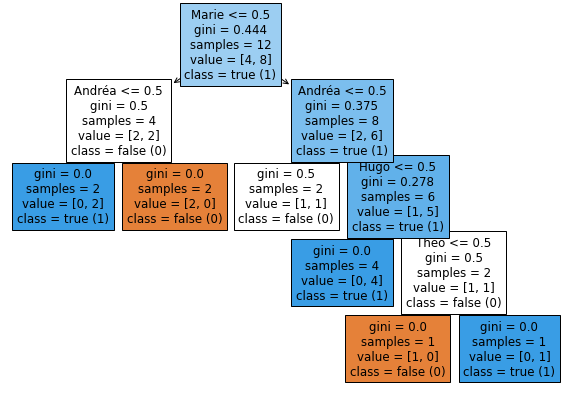

In [44]:
# X is the training set 
# Each example in X has 4 binary features
X = [[1, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0], [0, 1, 1, 0], [1, 1, 1, 1], [1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("Andréa","Théo" , "Marie", "Hugo"),
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)


In [45]:
# To reduce the dataset, we can remove the origin criterion.

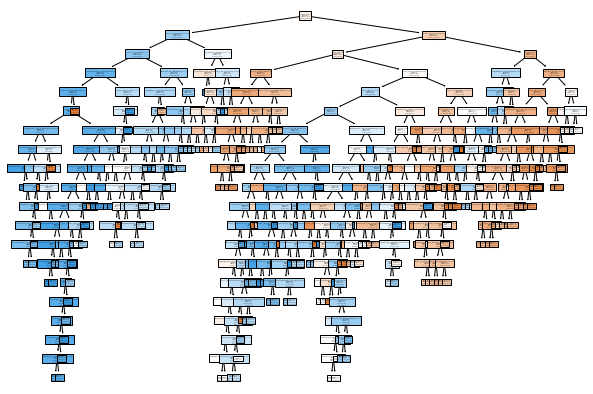

In [46]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

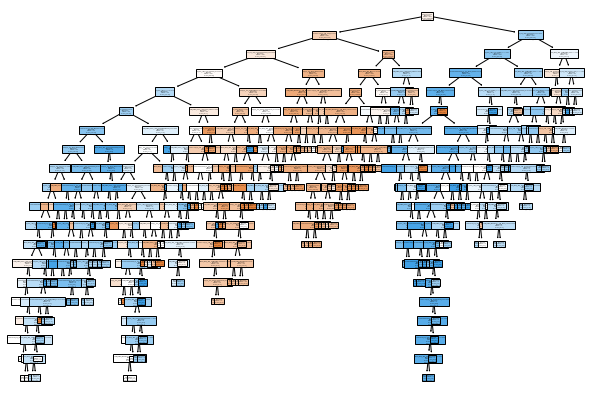

In [47]:
clf = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=2)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

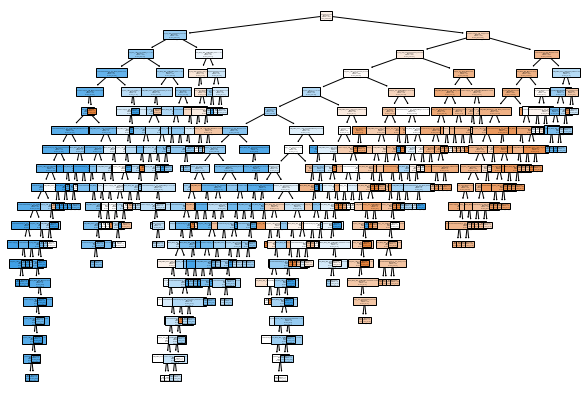

In [59]:
clf = tree.DecisionTreeClassifier(splitter="best", max_depth=None,min_samples_split=2)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

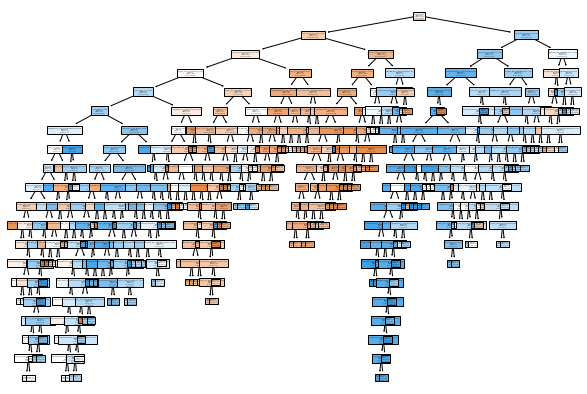

In [63]:
clf = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=2)
clf = clf.fit(train_examples, train_labels)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("false (0)", "true (1)" ), 
                   filled=True)

In [132]:
import numpy as np
from sklearn.model_selection import train_test_split

train_e, test_e, train_l, test_l = train_test_split(train_examples, train_labels, test_size = 0.2, train_size = 0.8)

clf = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=10)
clf = clf.fit(train_examples, train_labels)

clf = clf.fit(train_e, train_l)

clf.score(test_e, test_l)

0.656872037914692

In [51]:
#Le faire plusieurs fois pour la cross evalutation

In [52]:
for i in range(0, 5) :
    train_e, test_e, train_l, test_l = train_test_split(train_examples, train_labels, test_size = 0.2, train_size = 0.8)
    clf = clf.fit(train_e, train_l)
    print(clf.score(test_e, test_l))

0.6767772511848341
0.6530805687203791
0.6597156398104266
0.6606635071090048
0.6502369668246446


In [134]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.560 (0.116)


In [135]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="best", max_depth=None,min_samples_split=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.680 (0.068)


In [136]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=10,min_samples_split=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.680 (0.068)


In [137]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=2,min_samples_split=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.660 (0.073)


In [138]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=100,min_samples_split=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.580 (0.140)


In [139]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=1,min_samples_split=10)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.610 (0.120)


In [140]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=2)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.650 (0.063)


In [141]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=200)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.470 (0.060)


In [142]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=500)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.470 (0.060)


In [143]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=50)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.540 (0.124)


In [144]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = tree.DecisionTreeClassifier(splitter="random", max_depth=None,min_samples_split=2) #pas mettre min_samples_split à 1 --> grosse erreur
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.650 (0.114)


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)